# Feature selection
-----
- z-stack Movies were prepared from the merged tilescan images
- We are now ready for feature extraction from the movies


In [1]:
%matplotlib notebook

# Dependencies

import os
import cv2
import merging_functions as mf
import numpy as np
import tracker as tr

from matplotlib import pyplot as plt

In [2]:
# Go through each merged file and collect the resized image in a numpy array
def get_image_sequence(merged_folder, exp_name, acq_name, t_str, zstr_ar, img_dims):
    # Initialize the img numpy array
    img_seq = np.zeros((img_dims[0], img_dims[1], len(zstr_ar)))
    # Go over each z-stack image
    for zix in range(len(zstr_ar)):
        z_str = zstr_ar[zix]
        # Collect the path of the merged files
        merged_path = os.path.join(merged_folder, 
                                   f"{exp_name}_{acq_name}",
                                   f"{exp_name}_{acq_name}_Merged_{t_str}_{z_str}.tif")
        
        print(f"Collecting the image arrays for image file: \n\t{merged_path}")        
        # Read the image
        img = cv2.imread(merged_path)
        
        # Process the image for increased contrast
        img_blur = cv2.GaussianBlur(img, (11,11),0)
        
        # Add contrast for better visualization.
        alpha = 20
        beta = -10
        img_contrast = np.uint8(np.clip(alpha*img_blur + beta, 0, 255))        
        
        # Resize the image with given dimensions
        img_resized = cv2.resize(img_contrast, (img_dims[0], img_dims[1]))
        
        # Convert to grayscale image
        frame_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        
        # Add to the numpy array
        img_seq[:,:,zix] = frame_gray

    return img_seq


In [46]:
exp_name = "EQ59_Gly_03232021"
acq_name = "TileScan_Tp34-57_xyzt"
inner = True
radius = 150

exp_folder = os.path.join("D:", "Tolga", "Colony Images", exp_name)
# video_folder = os.path.join(exp_folder, "Videos_Marked", f"{exp_name}_{acq_name}")
merged_folder = os.path.join(exp_folder, "Merged")

metadata = mf.collect_metadata(exp_folder, exp_name, acq_name, inner)

In [47]:
metadata

{'dimensions': {'X': {'Length': 930.0,
   'NumberOfElements': 1024,
   'Unit': 'um',
   'Voxel': 0.909},
  'Y': {'Length': 930.0,
   'NumberOfElements': 1024,
   'Unit': 'um',
   'Voxel': 0.909},
  'Z': {'Length': -1000.0,
   'NumberOfElements': 235,
   'Unit': 'um',
   'Voxel': -4.0},
  'Stage': {'Length': '0.00',
   'NumberOfElements': 36,
   'Unit': '',
   'Voxel': None},
  'T': {'Length': '23h37m51.780s',
   'NumberOfElements': 24,
   'Unit': '',
   'Voxel': '0 s'}},
 'tiles': {'xix_lst': array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
         3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5]),
  'yix_lst': array([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
         4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]),
  'xix_unique_ar': array([0, 1, 2, 3, 4, 5]),
  'yix_unique_ar': array([0, 1, 2, 3, 4, 5]),
  'xpos_lst': array([79467.7301568, 79467.7301568, 79467.7301568, 79467.7301568,
         79467.7301568, 79467.7301568, 80368.6872288, 80368.6872

## Locate the center and the ROI of the image

In [50]:
t_str = "t08"
zsz = metadata["dimensions"]["Z"]["NumberOfElements"]
# Find the number of digits
znum_digit = len(str(zsz))
# zstr for file path
zstr_holder = f"z%0{znum_digit}d"

# calculate z_strar for each z_str value
z_strar = np.zeros(zsz, dtype="<U6")
for zix in range(zsz):
    z_strar[zix] = zstr_holder % zix

zar = np.arange(0,zsz)
img_seq = get_image_sequence(merged_folder, exp_name, acq_name, t_str, z_strar, (512,512))

	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z000.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z001.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z002.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z003.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z004.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z005.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileSc

	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z043.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z044.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z045.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z046.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z047.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z048.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileSc

	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z086.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z087.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z088.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z089.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z090.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z091.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileSc

	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z129.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z130.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z131.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z132.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z133.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z134.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileSc

	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z172.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z173.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z174.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z175.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z176.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z177.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileSc

	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z215.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z216.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z217.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z218.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z219.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt_Merged_t08_z220.tif
	D:Tolga\Colony Images\EQ59_Gly_03232021\Merged\EQ59_Gly_03232021_TileScan_Tp34-57_xyzt\EQ59_Gly_03232021_TileSc

In [53]:
# ## 24-48h
# centerx = 248
# centery = 245
# radius = 150

# ## 12-24h
centerx = 245
centery = 247
radius = 150


# ## 48-72h
# centerx = 245
# centery = 242
# radius = 150

img_seq_circle = np.zeros((512, 512, zsz)) # numpy 3d array image sequence to track max intensity images
for zix in range(zsz):
    roi_image = img_seq[:, :, zix]
    blurred_image = cv2.GaussianBlur(roi_image, (15,15), 0).astype(np.uint8)
    cv2.circle(blurred_image, (centerx, centery), radius, (255,255,255), 1)
    img_seq_circle[:,:,zix] = blurred_image
    

<IPython.core.display.Javascript object>


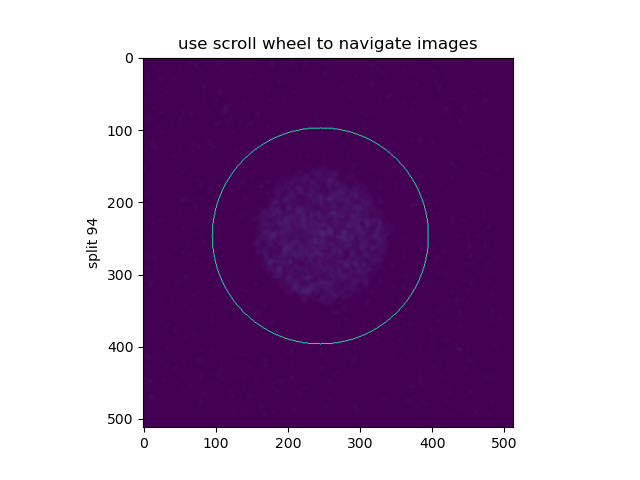

In [54]:
# Plot the image sequence in a figure
fig_maxint_img, ax = plt.subplots()
tracker = tr.IndexTracker(ax, img_seq_circle, "image", 150)#, args_dict)

fig_maxint_img.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [45]:
dim_vid = (512,512)
radius = 150
xsz = metadata["dimensions"]["X"]["NumberOfElements"]
width = xsz*len(metadata["tiles"]["xix_unique_ar"])
scale = width/dim_vid[0]
scale

12.0

## Calculate scale and select ROI from the merged image

In [55]:
dim_vid = (512,512)
# radius = 150
exp_name = "EQ59_Gly_03232021"
exp_folder = os.path.join("D:", "Tolga", "Colony Images", exp_name)

marked = False
full_stage = False

RR = 1800
centerxar = np.array([147, 245, 245])
centeryar = np.array([328, 247, 247])
inner = True

# Create a video for each acq_name
acq_name_ar = ["TileScan_Tp1-9_xyzt",
               "TileScan_Tp10-33_xyzt",
               "TileScan_Tp34-57_xyzt"]

for acix in range(len(acq_name_ar)):
    acq_name = acq_name_ar[acix]
    metadata = mf.collect_metadata(exp_folder, exp_name, acq_name, inner)
    
    xsz = metadata["dimensions"]["X"]["NumberOfElements"]
    width = xsz*len(metadata["tiles"]["xix_unique_ar"])
    scale = width/dim_vid[0]
    
    centerx = centerxar[acix]
    centery = centeryar[acix]
    
    Rx = centerx*scale
    Ry = centery*scale
    
    Rxleft = Rx-RR
    Rxright = Rx+RR
    if Rxleft < 0:
        Rxright = Rxright - Rxleft
        Rxleft = 0
    
    Ryleft=  Ry-RR
    Ryright = Ry+RR
    if Ryleft < 0:
        Ryright = Ryright - Ryleft
        Ryleft = 0
        
    ROIx = np.array([Rxleft, Rxright], dtype=np.int)
    ROIy = np.array([Ryleft, Ryright], dtype=np.int)

    mf.make_movie(metadata, ROIx, ROIy, RR, dim_vid, marked, full_stage)

## Calculate central sum and test for each z value
At the end, calculate the ROI from the center point +- radius*1.1 square.

In [ ]:
roix = np.array([centerx - radius, centerx + radius], dtype=np.int32)
roiy = np.array([centery - radius, centery + radius], dtype=np.int32)

roi_image = img_seq[roiy[0]:roiy[1], roix[0]:roix[1], 0]
height,width = roi_image.shape
img_seq_maxz = np.zeros((height, width, zsz)) # numpy 3d array image sequence to track max intensity images
Rar_pxl = np.arange(5,width/2, dr, dtype=np.int32)
plt_seq = np.zeros((2,len(Rar_pxl), zsz))
for zix in range(zsz):
    roi_image = img_seq[roiy[0]:roiy[1], roix[0]:roix[1], zix]
    blurred_image = cv2.GaussianBlur(roi_image, (15,15), 0).astype(np.uint8)
    # Use blurred_image for nice plots
    if zix%10 == 0:
        print(f"Calculating zix = {zix}/{zsz}", end="\r", flush=True)
    img_seq_maxz[:, :, zix] = blurred_image

    central_avg = collect_radial_data(blurred_image, Rar_pxl)
    plt_seq[0,:,zix] = Rar_pxl.copy()
    plt_seq[1,:,zix] = central_avg.copy()
    
fig_maxint_img, ax = plt.subplots(figsize=(4,4), dpi=200)
tracker = tr.IndexTracker(ax, plt_seq, "line", 70)
#     ax.set_xlim(0,40)
ax.set_ylim(0,1)
ax.set_xlabel("Radius (pxl)")
ax.set_ylabel("Average pixel brightness")
fig_maxint_img.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

### Collect the rmax(z) and cvmax(z).

In [ ]:
def window(size):
    return np.ones(size)/float(size)

window_average = 5

# Check the central sum for height measurement

# Choose above 0.1 central average (10% filled)
rmax = np.zeros(zsz)
cmax = np.zeros(zsz)
for zix in range(zsz):
    rad = plt_seq[0,:,zix]
    cav = plt_seq[1,:,zix]
    
    cavmax = np.max(cav)   # maximum value of the central average
    cavmaxarg = np.argmax(cav)  # index of the maximum central average value
    
    rmax[zix] = rad[cavmaxarg]
    cmax[zix] = cavmax
    
    
fig,ax = plt.subplots(figsize=(4,4), dpi=200)
ax.plot(zar, np.convolve(rmax, window(window_average), 'same'))
# ax.plot(zar, rmax)